In [2]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Read the CSV file into a DataFrame
dataFrame = pd.read_csv('heart_failure_clinical_records_dataset.csv')
dataFrame.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
dataFrame.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
values_count = dataFrame.pivot_table(index = ['DEATH_EVENT'], aggfunc ='size')
values_count

DEATH_EVENT
0    203
1     96
dtype: int64

In [7]:
X=dataFrame.iloc[:,0:12]
y=dataFrame.iloc[:,-1]

In [8]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=1)

In [10]:
def SVM_MODELS_KERNELS(kernel, x_train, y_train, x_test, y_test):

# Create and fit SVM model    
    SVM_MODEL = svm.SVC(kernel=kernel) # You can change the kernel parameter to 'poly', 'rbf', etc.
    SVM_MODEL.fit(x_train, y_train)

# Make predictions
    y_pred = SVM_MODEL.predict(x_test)
# Evaluate accuracy
    training_accuracy_SVM=SVM_MODEL.score(xtrain,ytrain)
    testing_accuracy_SVM=SVM_MODEL.score(xtest,ytest)

    print(f"Triaing Accuracy {training_accuracy_SVM}\nTesting Accuracy {testing_accuracy_SVM}")

    return training_accuracy_SVM, testing_accuracy_SVM, y_pred 

In [11]:
SVM_models_yPred = []

In [12]:
training_accuracy_LinearKernel, testing_accuracy_LinearKernel, y_pred_LinearKernel = SVM_MODELS_KERNELS("linear", xtrain, ytrain, xtest, ytest)
SVM_models_yPred.append(y_pred_LinearKernel)

Triaing Accuracy 0.8258928571428571
Testing Accuracy 0.8666666666666667


In [13]:
training_accuracy_PolyKernel, testing_accuracy_PolyKernel, y_pred_PolyKernel = SVM_MODELS_KERNELS("poly", xtrain, ytrain, xtest, ytest)
SVM_models_yPred.append(y_pred_PolyKernel)

Triaing Accuracy 0.8616071428571429
Testing Accuracy 0.7866666666666666


In [14]:
training_accuracy_RBFKernel, testing_accuracy_RBFKernel, y_pred_RBFKernel = SVM_MODELS_KERNELS("rbf", xtrain, ytrain, xtest, ytest)
SVM_models_yPred.append(y_pred_RBFKernel)

Triaing Accuracy 0.8883928571428571
Testing Accuracy 0.88


In [15]:
training_accuracy_SigmoidKernel, testing_accuracy_SigmoidKernel, y_pred_SigmoidKernel = SVM_MODELS_KERNELS("sigmoid", xtrain, ytrain, xtest, ytest)
SVM_models_yPred.append(y_pred_SigmoidKernel)

Triaing Accuracy 0.78125
Testing Accuracy 0.8266666666666667


In [16]:
Models={"Models":["SVM Linear Kernel","SVM Polynomial Kernel","SVM RBF Kernel","SVM Sigmoid Kernel"],\
       "Training_Accuracy (%)":[training_accuracy_LinearKernel*100, training_accuracy_PolyKernel*100, training_accuracy_RBFKernel*100, training_accuracy_SigmoidKernel*100],\
       "Testing_Accuracy (%)":[testing_accuracy_LinearKernel*100, testing_accuracy_PolyKernel*100, testing_accuracy_RBFKernel*100, testing_accuracy_SigmoidKernel*100]}

Scores=pd.DataFrame(Models)
Scores

,Models,Training_Accuracy (%),Testing_Accuracy (%)
0,SVM Linear Kernel,82.589286,86.666667
1,SVM Polynomial Kernel,86.160714,78.666667
2,SVM RBF Kernel,88.839286,88.000000
3,SVM Sigmoid Kernel,78.125000,82.666667


In [17]:
def confusion_Matrix(y_predicted, ytest, title):
    
    confusion_matrix = metrics.confusion_matrix(y_predicted, ytest)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Alive", "Dead"])

    fig, ax = plt.subplots()

    # Plot the confusion matrix using the ax parameter
    cm_display.plot(ax=ax)

    # Set a title for the plot using the set_title() method
    ax.set_title('Confusion Matrix for ' + title)

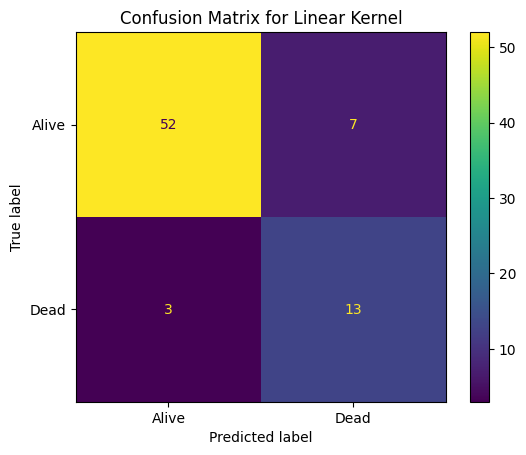

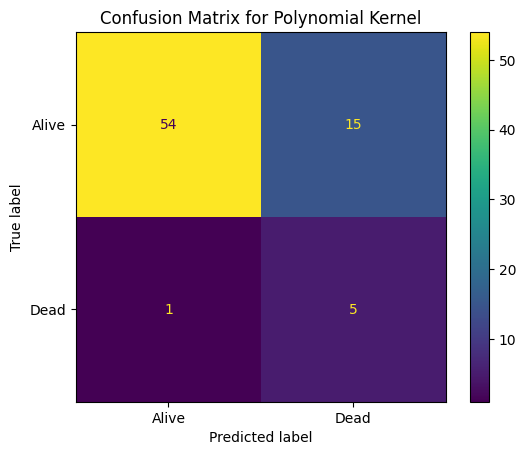

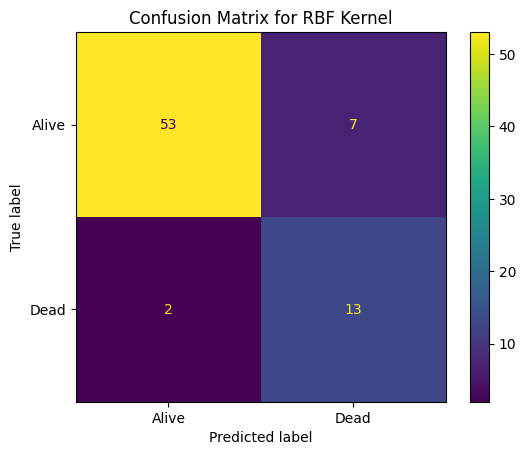

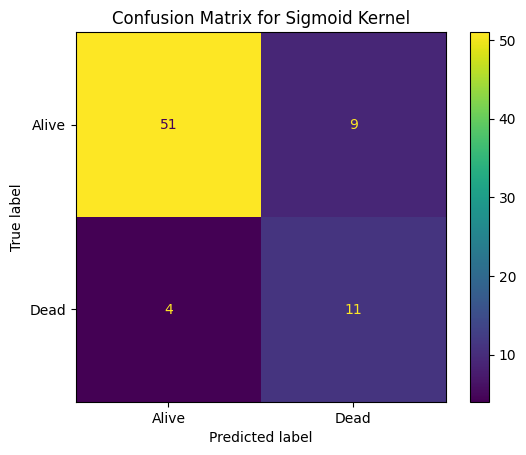

In [18]:
titles = ['Linear Kernel', 'Polynomial Kernel', 'RBF Kernel', 'Sigmoid Kernel']

zipped = zip(SVM_models_yPred, titles)
for pair in zipped:
    confusion_Matrix(pair[0], ytest, pair[1])


In [22]:
y= dataFrame['DEATH_EVENT']
X= dataFrame.drop(columns="DEATH_EVENT",axis=1)

                    features  importance
3                   diabetes    0.011359
10                   smoking    0.012022
1                    anaemia    0.012842
5        high_blood_pressure    0.013394
9                        sex    0.014768
8               serum_sodium    0.073022
2   creatinine_phosphokinase    0.080095
6                  platelets    0.080436
0                        age    0.090304
4          ejection_fraction    0.124841
7           serum_creatinine    0.143601
11                      time    0.343317


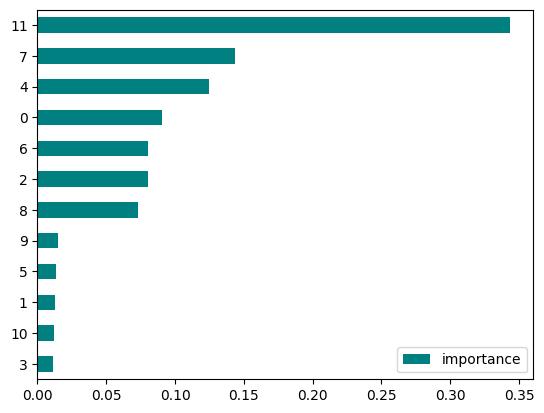

In [23]:
#Random Forests feature selection
rf = RandomForestClassifier(n_estimators=340)
rf.fit(X, y)
importance=rf.feature_importances_
feature=pd.DataFrame({"features":pd.DataFrame(X).columns,"importance":importance})
feature.set_index("importance")
feature=feature.sort_values("importance")
print(feature)
feature.plot(kind='barh',color='teal')
plt.show()

In [32]:
def compare(header, training_accuracy, testing_accuracy):
    Models={"Models":header,\
       "Training_Accuracy (%)":training_accuracy,\
       "Testing_Accuracy (%)":testing_accuracy}

    return pd.DataFrame(Models)


### Split data & cross validation on time ,serum ceratinine, ejection fraction

In [33]:
new_data= dataFrame[['time','serum_creatinine','ejection_fraction']]

xtrain_reduced,xtest_reduced,ytrain_reduced,ytest_reduced=train_test_split(new_data,y,test_size=0.25,random_state=1)

In [34]:
training_accuracy_LinearKernel_Feature_Reduction, testing_accuracy_LinearKernel_Feature_Reduction, y_pred_LinearKernel_Feature_Reduction = SVM_MODELS_KERNELS('linear',xtrain_reduced, ytrain_reduced, xtest_reduced, ytest_reduced)

header = ['Whole Data Linear Kernel', 'Feature Reduction Data Linear Kernel']

training_accuracies = [training_accuracy_LinearKernel, training_accuracy_LinearKernel_Feature_Reduction]

testing_accuracies = [testing_accuracy_LinearKernel, testing_accuracy_LinearKernel_Feature_Reduction]

table = compare(header, training_accuracies, testing_accuracies)

table

Triaing Accuracy 0.8258928571428571
Testing Accuracy 0.8533333333333334


,Models,Training_Accuracy (%),Testing_Accuracy (%)
0,Whole Data Linear Kernel,0.825893,0.866667
1,Feature Reduction Data Linear Kernel,0.825893,0.853333


In [35]:
training_accuracy_PolyKernel_Feature_Reduction, testing_accuracy_PolyKernel_Feature_Reduction, y_pred_PolyKernel_Feature_Reduction = SVM_MODELS_KERNELS('poly',xtrain_reduced, ytrain_reduced, xtest_reduced, ytest_reduced)

header = ['Whole Data Polynomial Kernel', 'Feature Reduction Data Polynomial Kernel']

training_accuracies = [training_accuracy_PolyKernel, training_accuracy_PolyKernel_Feature_Reduction]

testing_accuracies = [testing_accuracy_PolyKernel, testing_accuracy_PolyKernel_Feature_Reduction]

table = compare(header, training_accuracies, testing_accuracies)

table

Triaing Accuracy 0.7901785714285714
Testing Accuracy 0.76


,Models,Training_Accuracy (%),Testing_Accuracy (%)
0,Whole Data Polynomial Kernel,0.861607,0.786667
1,Feature Reduction Data Polynomial Kernel,0.790179,0.760000


In [36]:
training_accuracy_RBFKernel_Feature_Reduction, testing_accuracy_RBFKernel_Feature_Reduction, y_pred_RBFKernel_Feature_Reduction = SVM_MODELS_KERNELS('poly',xtrain_reduced, ytrain_reduced, xtest_reduced, ytest_reduced)

header = ['Whole Data RBF Kernel', 'Feature Reduction Data RBF Kernel']

training_accuracies = [training_accuracy_RBFKernel, training_accuracy_RBFKernel_Feature_Reduction]

testing_accuracies = [testing_accuracy_RBFKernel, testing_accuracy_RBFKernel_Feature_Reduction]

table = compare(header, training_accuracies, testing_accuracies)

table

Triaing Accuracy 0.7901785714285714
Testing Accuracy 0.76


,Models,Training_Accuracy (%),Testing_Accuracy (%)
0,Whole Data RBF Kernel,0.888393,0.88
1,Feature Reduction Data RBF Kernel,0.790179,0.76


In [37]:
training_accuracy_SigmoidKernel_Feature_Reduction, testing_accuracy_SigmoidKernel_Feature_Reduction, y_pred_SigmoidKernel_Feature_Reduction = SVM_MODELS_KERNELS('poly',xtrain_reduced, ytrain_reduced, xtest_reduced, ytest_reduced)

header = ['Whole Data Sigmoid Kernel', 'Feature Reduction Data Sigmoid Kernel']

training_accuracies = [training_accuracy_SigmoidKernel, training_accuracy_SigmoidKernel_Feature_Reduction]

testing_accuracies = [testing_accuracy_SigmoidKernel, testing_accuracy_SigmoidKernel_Feature_Reduction]

table = compare(header, training_accuracies, testing_accuracies)

table

Triaing Accuracy 0.7901785714285714
Testing Accuracy 0.76


,Models,Training_Accuracy (%),Testing_Accuracy (%)
0,Whole Data Sigmoid Kernel,0.781250,0.826667
1,Feature Reduction Data Sigmoid Kernel,0.790179,0.760000
